In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#LOAD DATASET

computer_df = pd.read_csv('DS1_C8_Computers_Data_Project.csv')
computer_df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [4]:
computer_df.isnull().sum() # Checking for null values

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

## BUSINESS OBJECTIVE 1 - Enhance Product Strategy & Sales Performance Through Specification Based Analysis

#TASK 1(a)

In [7]:
# Condition: RAM >= 8GB, Screen size = 14 inch, Processor speed > 33 MHz
condition = (computer_df['ram'] >= 8) & (computer_df['screen'] == 14) & (computer_df['speed'] > 33)

# Count of computers meeting the condition
computers_meeting_condition = computer_df[condition].shape[0]

# Total number of computers
total_computers = computer_df.shape[0]

# Probability calculation
probability = computers_meeting_condition / total_computers

print(f"Probability of purchasing a computer with at least 8GB RAM, 14 inch screen, and processor speed > 33 MHz: {probability:.2f}")

Probability of purchasing a computer with at least 8GB RAM, 14 inch screen, and processor speed > 33 MHz: 0.16


#TASK 1(b) 

In [8]:
# Part I: Probability of selling a premium computer
premium_count = computer_df[computer_df['premium'] == 'yes'].shape[0]
total_computers = computer_df.shape[0]

probability_premium = premium_count / total_computers
print(f"Probability of selling a premium computer: {probability_premium:.2f}")

# Part II: Given that a computer is premium, probability that it has a CD player
premium_with_cd_count = computer_df[(computer_df['premium'] == 'yes') & (computer_df['cd'] == 'yes')].shape[0]

probability_premium_cd = premium_with_cd_count / premium_count
print(f"Given that a computer is premium, probability that it has a CD player: {probability_premium_cd:.2f}")

Probability of selling a premium computer: 0.90
Given that a computer is premium, probability that it has a CD player: 0.50


#TASK 1(c) 

In [9]:
# Part I: Probability of having a screen size > 15 inches and being premium
condition_screen_premium = (computer_df['screen'] > 15) & (computer_df['premium'] == 'yes')
screen_premium_count = computer_df[condition_screen_premium].shape[0]

total_computers = computer_df.shape[0]
probability_screen_premium = screen_premium_count / total_computers
print(f"Probability of a computer having a screen size greater than 15 inches and being premium: {probability_screen_premium:.2f}")

# Part II: Given that a computer is not premium, probability that it has a screen size ≤ 14 inches
non_premium = computer_df[computer_df['premium'] == 'no']
non_premium_screen_condition = non_premium[non_premium['screen'] <= 14].shape[0]

non_premium_count = non_premium.shape[0]
if non_premium_count > 0:
    probability_non_premium_screen = non_premium_screen_condition / non_premium_count
    print(f"Given that a computer is not premium, probability that it has a screen size ≤ 14 inches: {probability_non_premium_screen:.2f}")
else:
    print("No non-premium computers in the dataset.")

Probability of a computer having a screen size greater than 15 inches and being premium: 0.08
Given that a computer is not premium, probability that it has a screen size ≤ 14 inches: 0.69


#TASK 1(d) 

In [11]:
# Part I: Joint probability of computers having both a CD player and a multimedia kit
condition_cd_and_multi = (computer_df['cd'] == 'yes') & (computer_df['multi'] == 'yes')
cd_and_multi_count = computer_df[condition_cd_and_multi].shape[0]

total_computers = computer_df.shape[0]
joint_probability_cd_and_multi = cd_and_multi_count / total_computers
print(f"Joint probability of having both a CD player and a multimedia kit: {joint_probability_cd_and_multi:.2f}")

# Part II: Given that a computer has a CD player, what is the probability that it also has a multimedia kit
cd_count = computer_df[computer_df['cd'] == 'yes'].shape[0]

if cd_count > 0:
    conditional_probability_cd_multi = cd_and_multi_count / cd_count
    print(f"Given that a computer has a CD player, probability that it also has a multimedia kit: {conditional_probability_cd_multi:.2f}")
else:
    print("No computers with a CD player in the dataset.")

Joint probability of having both a CD player and a multimedia kit: 0.14
Given that a computer has a CD player, probability that it also has a multimedia kit: 0.30


## BUSINESS OBJECTIVE 2 - Assessing Price Disparities Between Premium and Non-Premium Computers

#Task 2(a)

In [12]:
population_avg_price = computer_df['price'].mean()
print(f"Population average price of computers: {population_avg_price:.2f}")

Population average price of computers: 2219.58


#Task 2(b)

In [13]:
# 1. Simple Random Sampling
simple_random_sample = computer_df.sample(n=5, random_state=1)
simple_random_avg_price = simple_random_sample['price'].mean()
print(f"Average price (Simple Random Sampling): {simple_random_avg_price:.2f}")

# 2. Systematic Sampling (Selecting every 3rd computer)
systematic_sample = computer_df.iloc[::3]  # Start from the first row and take every 3rd row
systematic_avg_price = systematic_sample['price'].mean()
print(f"Average price (Systematic Sampling): {systematic_avg_price:.2f}")

# 3. Stratified Sampling (Stratifying by RAM)
strata = computer_df.groupby('ram', group_keys=False)
stratified_sample = strata.apply(lambda x: x.sample(frac=0.5, random_state=1))  # Sampling 50% from each strata
stratified_avg_price = stratified_sample['price'].mean()
print(f"Average price (Stratified Sampling by RAM): {stratified_avg_price:.2f}")

# 4. Cluster Sampling (Using screen size as clusters and selecting all computers from randomly chosen clusters)
clusters = computer_df.groupby('screen')
chosen_clusters = clusters.get_group(14)  # Choosing one cluster (screen size of 14 inches)
cluster_avg_price = chosen_clusters['price'].mean()
print(f"Average price (Cluster Sampling by screen size = 14): {cluster_avg_price:.2f}")

Average price (Simple Random Sampling): 3014.80
Average price (Systematic Sampling): 2214.96
Average price (Stratified Sampling by RAM): 2226.60
Average price (Cluster Sampling by screen size = 14): 2083.56


#TASK 2(c)

In [15]:
#2(c-i) : Average price of premium and non-premium computers in the whole dataset
premium_avg_price = computer_df[computer_df['premium'] == 'yes']['price'].mean()
non_premium_avg_price = computer_df[computer_df['premium'] == 'no']['price'].mean()

print(f"Average price of premium computers (whole data): {premium_avg_price:.2f}")
print(f"Average price of non-premium computers (whole data): {non_premium_avg_price:.2f}")

Average price of premium computers (whole data): 2204.15
Average price of non-premium computers (whole data): 2361.93


In [18]:
# 2(c-ii) : Sampling using Simple Random Sampling without replacement

simple_random_sample = computer_df.sample(n=20,replace=False, random_state=1)

# Calculate average price of premium and non-premium computers in the sampled data
premium_sample_avg_price = simple_random_sample[simple_random_sample['premium'] == 'yes']['price'].mean()
non_premium_sample_avg_price = simple_random_sample[simple_random_sample['premium'] == 'no']['price'].mean()

print(f"Average price of premium computers (sampled data): {premium_sample_avg_price:.2f}")
print(f"Average price of non-premium computers (sampled data): {non_premium_sample_avg_price:.2f}")

Average price of premium computers (sampled data): 2367.67
Average price of non-premium computers (sampled data): 3341.50


#TASK 2(d) 

1. Premium Computers (Whole Data vs. Sample):

In the full dataset, the average price of premium computers is 2204.15, while in the sample, it is 2367.67. The sampled average is slightly higher, which may be due to the randomness of the sample selection, where more expensive premium computers may have been selected by chance.

2. Non-Premium Computers (Whole Data vs. Sample):

The average price of non-premium computers in the whole dataset is 2361.93, and in the sample, it jumps to 3341.50. This larger difference could be due to the sample containing a disproportionate number of more expensive non-premium computers, possibly outliers that skew the average upward.

3. Comparison Between Premium and Non-Premium Computers:

Both in the whole dataset and in the sampled data, non-premium computers have a higher average price than premium ones. This challenges the common assumption that premium computers are always more expensive.
In the sample, the price gap between non-premium and premium computers is even larger (3341.50 Vs. 2367.67), which could be a result of sampling variability.

## BUSINESS OBJECTIVE 3 

#TASK 3(a) 

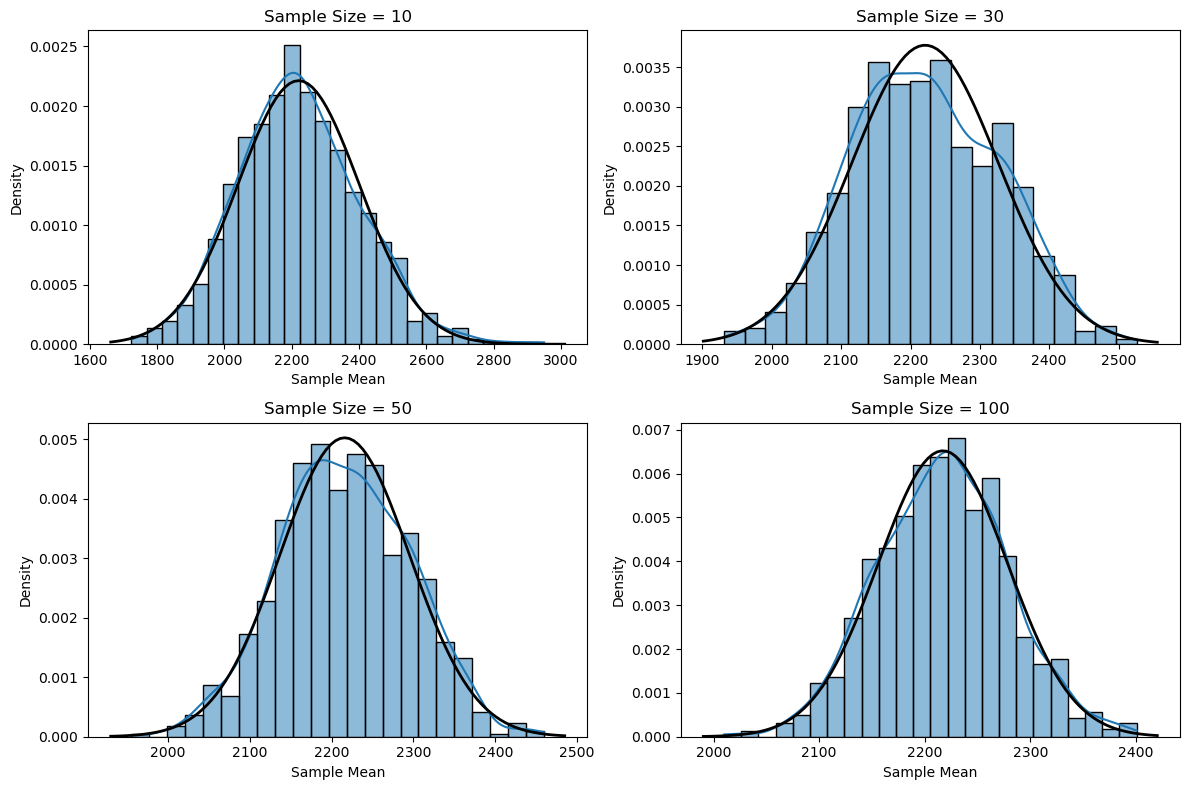

In [26]:
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")


# Function to calculate sample means for different sample sizes
def sample_means_distribution(computer_df, sample_size, num_samples=1000):
    means = []
    for _ in range(num_samples):
        sample = computer_df['price'].sample(sample_size, replace=True)
        means.append(sample.mean())
    return np.array(means)

# Sample sizes to test
sample_sizes = [10, 30, 50, 100]

# Create a figure for subplots
plt.figure(figsize=(12, 8))

# Distribution of sample means for different sample sizes
for i, size in enumerate(sample_sizes, 1):
    sample_means = sample_means_distribution(computer_df, size)
    
    plt.subplot(2, 2, i)
    sns.histplot(sample_means, kde=True, stat='density')
    plt.title(f'Sample Size = {size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')

    # Overlay normal distribution for reference
    mu, std = np.mean(sample_means), np.std(sample_means)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()


In [ ]:
# The distribution of sample means will become more concentrated around the true population mean as the sample size increases.

#TASK 3(b) 

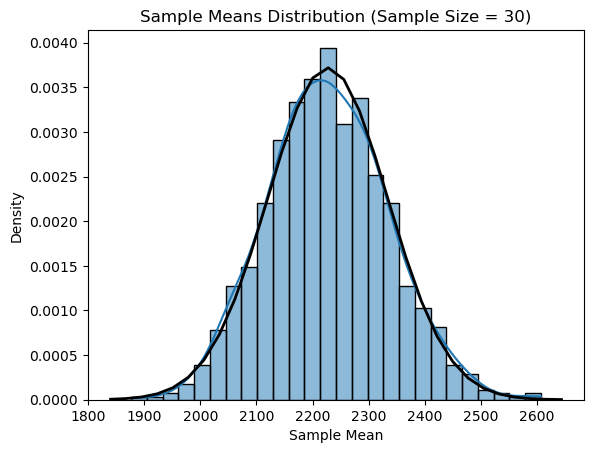

In [27]:
# Let's check the skewness and kurtosis for one of the sample means (size = 30)
sample_means_30 = sample_means_distribution(computer_df, 30)

# Plot histogram of sample means with normal distribution
sns.histplot(sample_means_30, kde=True, stat='density')
plt.title('Sample Means Distribution (Sample Size = 30)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

# Overlay normal distribution
mu_30, std_30 = np.mean(sample_means_30), np.std(sample_means_30)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 30)
p = norm.pdf(x, mu_30, std_30)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

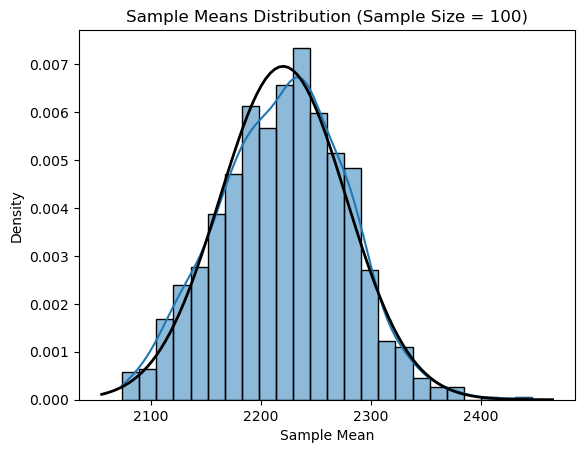

In [28]:
# Let's check the skewness and kurtosis for one of the sample means (size = 100)
sample_means_100 = sample_means_distribution(computer_df, 100)

# Plot histogram of sample means with normal distribution
sns.histplot(sample_means_100, kde=True, stat='density')
plt.title('Sample Means Distribution (Sample Size = 100)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

# Overlay normal distribution
mu_100, std_100 = np.mean(sample_means_100), np.std(sample_means_100)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_100, std_100)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [ ]:
# sample means will begin to resemble a normal distribution as the sample size increases.

#TASK 3(c)

In [25]:
# Properties of Central Limit Theorem
# 1. Mean of sample means should be approximately equal to population mean
population_mean = computer_df['price'].mean()
sample_means_mean = np.mean(sample_means_100)
print(f"Population Mean: {population_mean:.2f}")
print(f"Mean of Sample Means (n=100): {sample_means_mean:.2f}")

# 2. Standard deviation of sample means should be approximately equal to population std/sqrt(sample size)
population_std = computer_df['price'].std()
sample_means_std = np.std(sample_means_100)
expected_std = population_std / np.sqrt(100)

print(f"Population Standard Deviation: {population_std:.2f}")
print(f"Standard Deviation of Sample Means (n=100): {sample_means_std:.2f}")
print(f"Expected Standard Deviation (n=100): {expected_std:.2f}")

Population Mean: 2219.58
Mean of Sample Means (n=100): 2217.56
Population Standard Deviation: 580.80
Standard Deviation of Sample Means (n=100): 58.13
Expected Standard Deviation (n=100): 58.08


In [ ]:
'''
 The mean of the sample means are close to the population mean.
 The standard deviation of the sample means are approximate the population standard deviation divided by the square root of the sample size. 
 Thus, it satisfies the CLT theorem.
"""